In [2]:
import pyaccel as pa
import pymodels as pm
import matplotlib.pyplot as plt
from apsuite.commisslib.bo_emittance_exchange import EmittanceExchangeSimul

Tracking

In [8]:
simul = EmittanceExchangeSimul(c=0.01, s=3.0, radiation=False)

In [9]:
simul.generate_bunch(2000)

In [10]:
simul.dynamic_emit_exchange()

---------------------Tracking particles----------------------
Initial delta = -10.984 [C] 
 N = 732
step 0	

step 100	step 200	step 300	step 400	step 500	

step 600	step 700	Done!


Analytical model
\begin{equation}
 \epsilon_x^{RMS} = \epsilon_{x0}^{RMS} + g(\Delta, |C|) \frac{\epsilon^{RMS}_{y0} - \epsilon^{RMS}_{x0}}{2}, \\
    \epsilon_{y0}^{RMS} = \epsilon_{y0}^{RMS} - g(\Delta, |C|) \frac{\epsilon^{RMS}_{y0} - \epsilon^{RMS}_{x0}}{2}.
\end{equation}

with 
\begin{equation}
g(|C|, \Delta) = \frac{|C|^2}{\Delta^2 + |C|^2 + \Delta\sqrt{\Delta^2 + |C|^2}},
\end{equation}

In [12]:
emitx0, emity0 = simul.emittances[:, 0]

In [21]:
g = lambda delta, c: c**2/(delta**2 + c**2 - delta*np.sqrt(delta**2+c**2))

In [24]:
emitx_an = emitx0 + g(simul.deltas, simul.coupling_coeff)*(emity0 - emitx0)/2
emity_an = emity0 - g(simul.deltas, simul.coupling_coeff)*(emity0 - emitx0)/2

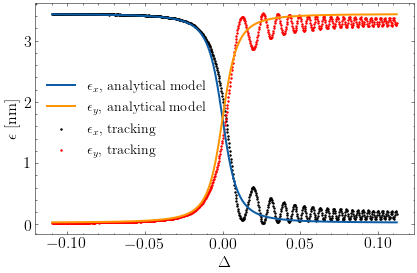

In [59]:
plt.style.use(['science'])
plt.figure(figsize=(6,4))
    
plt.plot(simul.deltas, emitx_an*1e9, lw=2,label='$\epsilon_x,$ analytical model', c='C0')
plt.plot(simul.deltas, emity_an*1e9, lw=2,label='$\epsilon_y,$ analytical model', c='C2')
plt.scatter(simul.deltas, simul.emittances[0]*1e9, s=2, marker='o', c='k',label='$\epsilon_x,$ tracking')
plt.scatter(simul.deltas, simul.emittances[1]*1e9, s=2, marker='o', c='r',label='$\epsilon_y,$ tracking')
plt.xlabel('$\Delta$')
plt.ylabel('$\epsilon$ [nm]')
# plt.title('Comparasion between analytical model and tracking for the Sirius lattice')
plt.tight_layout()
plt.legend(loc='center left', fontsize=14)
plt.savefig(fname='figures/emit_exchange_studies/analytical_vs_tracking.pdf')